# Project Objective

- To predict who will respond to an offer for a product or service and boost the profit of a marketing campaign

Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [6]:
data = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
data.shape

(2240, 29)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Data Preprocessing

In [12]:
# Drop ID column
data = data.drop('ID', axis=1)

In [13]:
{column: len(data[column].unique()) for column in data.columns}

{'Year_Birth': 59,
 'Education': 5,
 'Marital_Status': 8,
 'Income': 1975,
 'Kidhome': 3,
 'Teenhome': 3,
 'Dt_Customer': 663,
 'Recency': 100,
 'MntWines': 776,
 'MntFruits': 158,
 'MntMeatProducts': 558,
 'MntFishProducts': 182,
 'MntSweetProducts': 177,
 'MntGoldProds': 213,
 'NumDealsPurchases': 15,
 'NumWebPurchases': 15,
 'NumCatalogPurchases': 14,
 'NumStorePurchases': 14,
 'NumWebVisitsMonth': 16,
 'AcceptedCmp3': 2,
 'AcceptedCmp4': 2,
 'AcceptedCmp5': 2,
 'AcceptedCmp1': 2,
 'AcceptedCmp2': 2,
 'Complain': 2,
 'Z_CostContact': 1,
 'Z_Revenue': 1,
 'Response': 2}

In [14]:
data.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [15]:
data.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [21]:
data['Marital_Status'] = data['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Others',
    'YOLO': 'Others'
})

In [22]:
data.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: count, dtype: int64

In [34]:
data['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

<Axes: ylabel='count'>

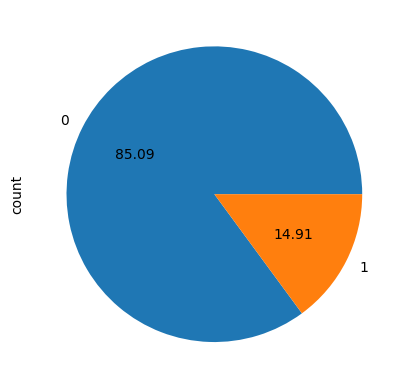

In [52]:
data['Response'].value_counts().plot.pie(autopct='%.2f')

This is an imbalanced dataset

In [23]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [35]:
def preprocess_inputs(df):
    df = df.copy()

    # Fill missing Income values with column mean
    df['Income'] = df['Income'].fillna(df['Income'].mean())

    # Date encoding
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
    df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
    df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
    df = df.drop('Dt_Customer', axis=1)

    # One-hot encoding
    for column in ['Education', 'Marital_Status']:
        df = onehot_encode(df, column=column)

    # Split df into X and y
    y = df['Response']
    X = df.drop('Response', axis=1)


    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [37]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [38]:
X_train.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Others,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
1896,0.753150,-1.288841,1.039855,-0.946945,0.088299,-0.908272,-0.559424,-0.696729,-0.157056,-0.661538,...,6.027714,-0.997452,-0.454042,-0.531124,-0.34641,-0.789423,-0.043783,-0.537042,1.735001,-0.187039
447,-0.406258,1.406926,-0.821438,-0.946945,1.300064,0.283947,4.068166,1.653188,0.424741,3.154732,...,-0.165900,1.002554,-0.454042,-0.531124,-0.34641,-0.789423,-0.043783,1.862052,-0.576368,-0.187039
1721,1.167225,1.944750,-0.821438,-0.946945,0.746114,2.028732,0.435756,3.427888,-0.157056,-0.049956,...,-0.165900,-0.997452,-0.454042,1.882798,-0.34641,1.266748,-0.043783,-0.537042,-0.576368,-0.187039
2113,0.421891,-0.421436,-0.821438,0.899833,-0.119432,-0.806168,-0.559424,-0.665515,-0.557041,-0.514758,...,-0.165900,-0.997452,2.202441,-0.531124,-0.34641,-0.789423,-0.043783,-0.537042,1.735001,-0.187039
255,0.421891,-1.001061,1.039855,-0.946945,-0.500272,-0.839201,-0.658942,-0.705647,-0.684310,-0.661538,...,-0.165900,-0.997452,-0.454042,1.882798,-0.34641,-0.789423,-0.043783,1.862052,-0.576368,-0.187039


Training

In [48]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
40/40 [==============================] - 5s 11ms/step - loss: 0.3956 - accuracy: 0.8541 - auc: 0.6695 - val_loss: 0.3872 - val_accuracy: 0.8631 - val_auc: 0.7463
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.8868 - auc: 0.9024 - val_loss: 0.3878 - val_accuracy: 0.8694 - val_auc: 0.7860
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2219 - accuracy: 0.9043 - auc: 0.9309 - val_loss: 0.4076 - val_accuracy: 0.8694 - val_auc: 0.7878
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.1849 - accuracy: 0.9266 - auc: 0.9531 - val_loss: 0.4051 - val_accuracy: 0.8662 - val_auc: 0.7945


Result

In [49]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.30623
Test Accuracy: 89.14%
     Test AUC: 0.83600


21/21 [==============================] - 0s 3ms/step


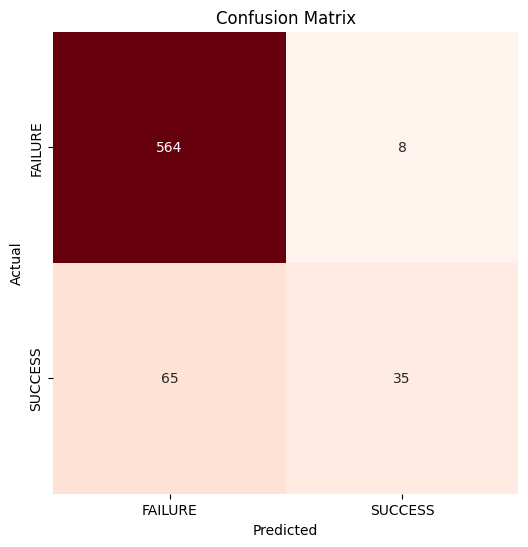

Classification Report:
----------------------
               precision    recall  f1-score   support

     FAILURE       0.90      0.99      0.94       572
     SUCCESS       0.81      0.35      0.49       100

    accuracy                           0.89       672
   macro avg       0.86      0.67      0.71       672
weighted avg       0.88      0.89      0.87       672



In [51]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["FAILURE", "SUCCESS"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)